# Tetrode processing

## Imports

In [1]:
import spikeinterface.full as si
import spikeinterface.extractors as se
import probeinterface as pi
from probeinterface import generate_tetrode, ProbeGroup
from probeinterface.plotting import plot_probe, plot_probegroup


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pathlib import Path
import os

import warnings
warnings.simplefilter("ignore")

%matplotlib widget
print(f"SpikeInterface version: {si.__version__}")
np.set_printoptions(threshold=np.inf)


SpikeInterface version: 0.101.1


## Read in Data

In [2]:
path_to_data = "C:\\Users\\ryanz\\Documents\\NAc Analysis\\raw\\CPWI18_2019-07-29_13-50-50_LRRLLR 400uA\\CPWI18_2019-07-29_13-50-50_LRRLLR 400uA"
full_raw_rec = si.read_openephys(path_to_data)


## Generate Probe Group

Need more info on the tetrode used to record this data. <br>
For now, 8 tetrodes are assumed with 32 total channels. <br> Channels are assigned to tetrodes in order of appearance in the id list provided. This needs to be validated

32


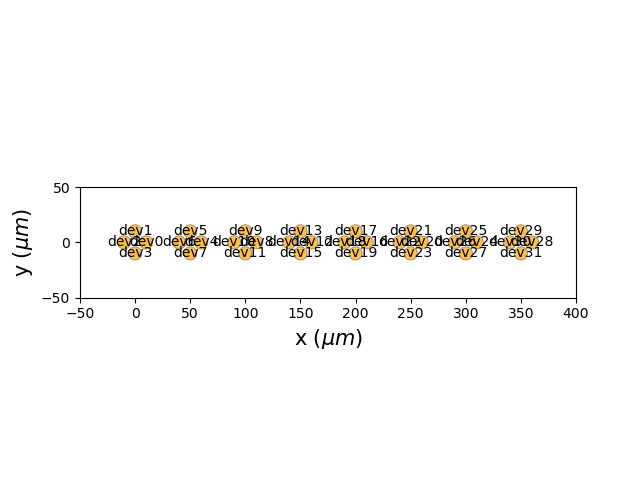

In [3]:
channel_names = list(full_raw_rec.get_channel_ids())
channels = [int(channel[2:]) - 1 for channel in channel_names]
print(len(channels))
probe_group = ProbeGroup()
for i in range(int(len(channels) / 4)):
    tetrode = generate_tetrode()
    tetrode.move([i * 50, 0])
    probe_group.add_probe(tetrode)
    
probe_group.set_global_device_channel_indices([i for i in range(32)])
raw_rec = full_raw_rec.set_probegroup(probe_group, group_mode="by_probe")
plot_probegroup(probe_group, with_device_index=True, same_axes=True)


In [4]:
probe_group.to_dataframe(complete=True)

,probe_index,x,y,contact_shapes,radius,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,0,1.000000e+01,0.000000e+00,circle,6.0,,,0,um,1.0,0.0,0.0,1.0
1,0,6.123234e-16,1.000000e+01,circle,6.0,,,1,um,1.0,0.0,0.0,1.0
2,0,-1.000000e+01,1.224647e-15,circle,6.0,,,2,um,1.0,0.0,0.0,1.0
3,0,-1.836970e-15,-1.000000e+01,circle,6.0,,,3,um,1.0,0.0,0.0,1.0
4,1,6.000000e+01,0.000000e+00,circle,6.0,,,4,um,1.0,0.0,0.0,1.0
5,1,5.000000e+01,1.000000e+01,circle,6.0,,,5,um,1.0,0.0,0.0,1.0
6,1,4.000000e+01,1.224647e-15,circle,6.0,,,6,um,1.0,0.0,0.0,1.0
7,1,5.000000e+01,-1.000000e+01,circle,6.0,,,7,um,1.0,0.0,0.0,1.0
8,2,1.100000e+02,0.000000e+00,circle,6.0,,,8,um,1.0,0.0,0.0,1.0
9,2,1.000000e+02,1.000000e+01,circle,6.0,,,9,um,1.0,0.0,0.0,1.0


In [5]:
raw_rec.get_channel_groups()

array([0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5,
       5, 5, 6, 6, 6, 6, 7, 7, 7, 7], dtype=int64)

In [6]:
raw_rec.get_channel_ids()

array(['CH4', 'CH5', 'CH6', 'CH7', 'CH2', 'CH3', 'CH30', 'CH31', 'CH26',
       'CH27', 'CH28', 'CH29', 'CH22', 'CH23', 'CH24', 'CH25', 'CH18',
       'CH19', 'CH20', 'CH21', 'CH1', 'CH16', 'CH17', 'CH32', 'CH12',
       'CH13', 'CH14', 'CH15', 'CH8', 'CH9', 'CH10', 'CH11'], dtype='<U64')

## Behavioral Data

In [7]:
df = pd.read_excel("C:\\Users\\ryanz\\Documents\\NAc Analysis\\raw\\behavioraldata\\CPWI18_2019-07-29_13-50-50_LRRLLR 400uA Normalized.xlsx")
df

,Unnamed: 0,Trial Start,Trial End,Seek Attempted,Seek P/F,Left Entries,Right Entries,Tones,Shock,Take,Take Time,Trial Block
0,0,1.845467,19.825133,False,NaN,NaN,"[9.555333333333351, 9.805333333333351]","[[9.555333333333351, 9.65569999999991]]",False,NaN,NaN,0
1,1,20.825100,45.924633,True,Pass,"[30.50490000000002, 45.924633333333304]","[24.085033333333286, 28.46496666666667, 40.514...","[[24.08506666666665, 24.185400000000072], [28....",True,1.0,45.924633,0
2,2,55.704433,82.133900,False,NaN,[68.77416666666659],"[58.104400000000055, 62.724300000000085]","[[58.104400000000055, 58.20473333333325]]",False,NaN,NaN,0
3,3,83.323867,106.333467,True,Pass,"[88.28380000000004, 106.33346666666671]","[85.88383333333343, 91.85373333333325, 94.2736...","[[85.88383333333343, 85.98419999999999], [91.8...",True,1.0,106.333467,0
4,4,116.143233,116.223233,True,Fail,[116.22323333333327],NaN,[],False,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...
244,244,7528.296900,7538.296700,False,NaN,NaN,NaN,[],False,NaN,NaN,0
245,245,7539.296667,7549.296467,False,NaN,NaN,NaN,[],False,NaN,NaN,0
246,246,7550.296467,7557.736333,True,Pass,[7557.736333333332],"[7550.826466666667, 7551.056466666667, 7552.78...","[[7550.826466666667, 7550.926833333333], [7551...",False,1.0,7557.736333,0
247,247,7567.066133,7577.065933,False,NaN,NaN,NaN,[],False,NaN,NaN,0


## First Visualization: Trace

Visualize voltage fluctuations as a function of time <br>
Set mode to "line" for better visualization <br>
both raw data and filtered data (getting rid of natural voltage fluctuations) are overlayed on top of eachother

In [13]:
save_path = "C:\\Users\\ryanz\\Documents\\NAc Analysis\\traces"
#remove noise
recording_f = si.bandpass_filter(raw_rec, freq_min=300, freq_max=9000)
recording_cmr = si.common_reference(recording_f, reference='global', operator='median')

#plot trace
w = si.plot_traces(recording_cmr, mode='line', time_range=[9.8, 10], backend="ipywidgets", events=np.array([18.6]), color_groups=True, show_channel_ids=True)

#this will be the recording we will use in future processing
recording_loaded = recording_cmr

AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

In [10]:
#save recording with noise removed
#recording_saved = recording_cmr.save(folder=save_path + "\\test_trace")

In [11]:
#restore recording
#recording_loaded = si.load_extractor("C:\\Users\\ryanz\\Documents\\NAc Analysis\\traces\\test_trace")

## Removing bad channels

In [33]:
%matplotlib widget
bad_channel_ids, channel_labels = si.detect_bad_channels(recording_f, method='coherence+psd')
print('bad_channel_ids', bad_channel_ids)
print('channel_labels', channel_labels)
recording_good_channels_f = recording_f.remove_channels(bad_channel_ids)
recording_good_channels = si.common_reference(recording_good_channels_f, reference='global', operator='median')

print(recording_good_channels)
print(recording_good_channels.channel_ids)

w = si.plot_traces(recording_good_channels, mode='line', time_range=[18.5, 19], backend="ipywidgets", events=np.array([18.6]), color_groups=True)

recording_loaded = recording_good_channels

bad_channel_ids ['CH3' 'CH31' 'CH26' 'CH27' 'CH28' 'CH29' 'CH1' 'CH16' 'CH17' 'CH32']
channel_labels ['good' 'good' 'good' 'good' 'good' 'dead' 'good' 'dead' 'dead' 'dead'
 'dead' 'dead' 'good' 'good' 'good' 'good' 'good' 'good' 'good' 'good'
 'dead' 'dead' 'dead' 'dead' 'good' 'good' 'good' 'good' 'good' 'good'
 'good' 'good']
CommonReferenceRecording: 22 channels - 30.0kHz - 1 segments - 239,508,300 samples 
                          7,983.61s (2.22 hours) - int16 dtype - 9.81 GiB
['CH4' 'CH5' 'CH6' 'CH7' 'CH2' 'CH30' 'CH22' 'CH23' 'CH24' 'CH25' 'CH18'
 'CH19' 'CH20' 'CH21' 'CH12' 'CH13' 'CH14' 'CH15' 'CH8' 'CH9' 'CH10'
 'CH11']


AppLayout(children=(TimeSlider(children=(Dropdown(description='segment', options=(0,), value=0), Button(icon='…

## Sorting Spikes

In [26]:
#only take the first 60 seconds for processing speed purposes: need to set up cuda to run with GPU
fs = recording_loaded.get_sampling_frequency()
recording_sub = recording_loaded.frame_slice(start_frame=0*fs, end_frame=60*fs)


In [27]:
#sort spikes
save_path = "C:\\Users\\ryanz\\Documents\\NAc Analysis\\sorted"
sorted_recording = si.run_sorter(sorter_name='spykingcircus2', recording=recording_sub, remove_existing_folder=True, output_folder=save_path + "\\test_sorted", verbose=True)


Geometry of the probe does not allow 1D drift correction


write_memory_recording:   0%|          | 0/60 [00:00<?, ?it/s]

detect peaks using locally_exclusive:   0%|          | 0/60 [00:00<?, ?it/s]

extract waveforms shared_memory mono buffer:   0%|          | 0/60 [00:00<?, ?it/s]

detect peaks using matched_filtering:   0%|          | 0/600 [00:00<?, ?it/s]

We found 20935 peaks in total
We kept 20935 peaks for clustering


extract waveforms shared_memory mono buffer:   0%|          | 0/60 [00:00<?, ?it/s]

extracting features:   0%|          | 0/60 [00:00<?, ?it/s]

split_clusters with local_feature_clustering:   0%|          | 0/21 [00:00<?, ?it/s]

estimate_templates:   0%|          | 0/60 [00:00<?, ?it/s]

We found 22 raw clusters, starting to clean with matching...


write_memory_recording:   0%|          | 0/1 [00:00<?, ?it/s]

We kept 22 non-duplicated clusters...


estimate_templates:   0%|          | 0/60 [00:00<?, ?it/s]

find spikes (wobble):   0%|          | 0/600 [00:00<?, ?it/s]

We found 11406 spikes
Final merging, keeping 22 units
spykingcircus2 run time 103.42s


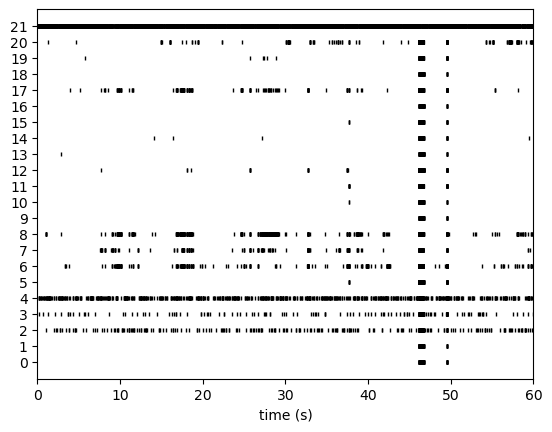

In [29]:
#plot rasters
%matplotlib inline
w_rs = si.plot_rasters(sorted_recording, time_range=(0,60), backend="matplotlib")


In [16]:
#create and save sorting analyzer object
save_path = "C:\\Users\\ryanz\\Documents\\NAc Analysis\\waveforms"
sorting_analyzer = si.create_sorting_analyzer(sorted_recording, 
                                              recording_sub, 
                                              folder=save_path + "\\test_waveforms",
                                              format="binary_folder",
                                              sparse=False, 
                                              overwrite=True)


SortingAnalyzer: 22 channels - 22 units - 1 segments - binary_folder - has recording
Loaded 0 extensions: 


In [17]:
#load sorting analyzer object
sorting_analyzer = si.load_sorting_analyzer(folder=save_path + "\\test_waveforms")


In [18]:
sorting_analyzer.compute(["random_spikes", "waveforms"])


compute_waveforms:   0%|          | 0/60 [00:00<?, ?it/s]

In [24]:
ext = sorting_analyzer.get_extension("waveforms")
ext_data = ext.get_data()


In [29]:
ext_data.shape

(6128, 90, 22)

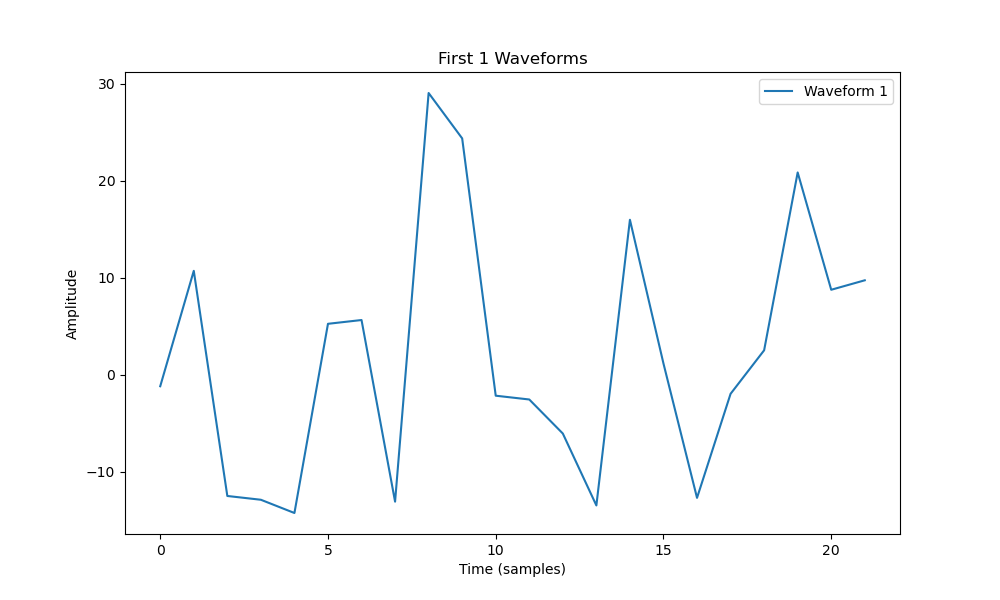

In [35]:
waveforms = np.array(ext_data)  # or just use ext_data directly if it works

# Plotting the first few waveforms for visualization
num_waveforms_to_plot = 1  # Number of waveforms to visualize
plt.figure(figsize=(10, 6))

num = 6
plt.plot(waveforms[num][num], label=f'Waveform {1}')

plt.title(f'First {num_waveforms_to_plot} Waveforms')
plt.xlabel('Time (samples)')
plt.ylabel('Amplitude')
plt.legend()
plt.show()
